##Importar dependencias a utilizar


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import sklearn as skl
from sklearn.cluster import KMeans


In [15]:
##Se seleccionan las columnas que se van a utilizar para agrupar los datos para aplicar el algoritmo de K-means

df = pd.read_csv('Dataset.csv')
##Se toman unicamente las variables que cuentan con datos numericos y la variable tipo que es categorica para identificar el tipo de movimiento realizado
df= df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "type"]]
##Debido a que type es una columna categorica, se procede a convertirla en numerica para que pueda ser utilizada en el algoritmo de K-means, para esto se implementa la tecnica de one-hot-encoding
encoder = OneHotEncoder(sparse_output=False, drop="first")  # drop="first" evita multicolinealidad
type_encoded = encoder.fit_transform(df[["type"]])
type_encoded_df = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(["type"]))
# Concatenar al dataset original y eliminar la columna 'type'
df = pd.concat([df.drop("type", axis=1).reset_index(drop=True), type_encoded_df.reset_index(drop=True)], axis=1)

print(df.head())

     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0   9839.64       170136.0       160296.36             0.0             0.0   
1   1864.28        21249.0        19384.72             0.0             0.0   
2    181.00          181.0            0.00             0.0             0.0   
3    181.00          181.0            0.00         21182.0             0.0   
4  11668.14        41554.0        29885.86             0.0             0.0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0            0.0         0.0           1.0            0.0  
1            0.0         0.0           1.0            0.0  
2            0.0         0.0           0.0            1.0  
3            1.0         0.0           0.0            0.0  
4            0.0         0.0           1.0            0.0  


In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convertir de nuevo a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

print(df_scaled.head())

     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0 -0.281560      -0.229810       -0.237622       -0.323814       -0.333411   
1 -0.294767      -0.281359       -0.285812       -0.323814       -0.333411   
2 -0.297555      -0.288654       -0.292442       -0.323814       -0.333411   
3 -0.297555      -0.288654       -0.292442       -0.317582       -0.333411   
4 -0.278532      -0.274329       -0.282221       -0.323814       -0.333411   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0      -0.736484    -0.08096      1.399036      -0.302345  
1      -0.736484    -0.08096      1.399036      -0.302345  
2      -0.736484    -0.08096     -0.714778       3.307478  
3       1.357803    -0.08096     -0.714778      -0.302345  
4      -0.736484    -0.08096      1.399036      -0.302345  


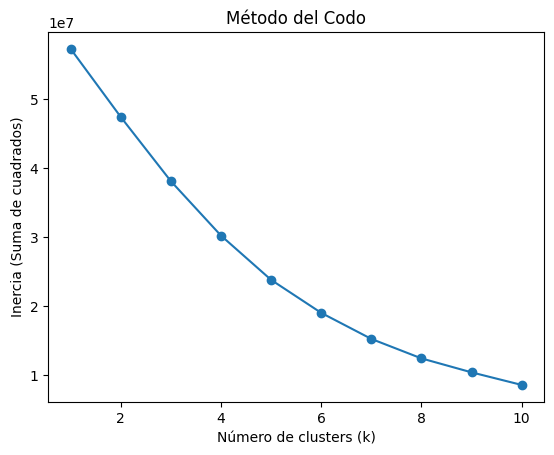

In [18]:
# Lista para guardar la inercia (distancia total a los centroides)
inertia = []

# Probar diferentes valores de k (número de clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Suma de cuadrados)")
plt.title("Método del Codo")
plt.show()

In [19]:
# Entrenar modelo con k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)

print(df.head())
print(df["cluster"].value_counts())

     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0   9839.64       170136.0       160296.36             0.0             0.0   
1   1864.28        21249.0        19384.72             0.0             0.0   
2    181.00          181.0            0.00             0.0             0.0   
3    181.00          181.0            0.00         21182.0             0.0   
4  11668.14        41554.0        29885.86             0.0             0.0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  cluster  
0            0.0         0.0           1.0            0.0        1  
1            0.0         0.0           1.0            0.0        1  
2            0.0         0.0           0.0            1.0        0  
3            1.0         0.0           0.0            0.0        2  
4            0.0         0.0           1.0            0.0        1  
cluster
2    3310222
1    2151423
0     545231
3     355744
Name: count, dtype: int64


In [20]:
cluster_summary = df.groupby("cluster").agg(["mean", "median", "std"])
print(cluster_summary)

                amount                           oldbalanceOrg              \
                  mean      median           std          mean      median   
cluster                                                                      
0        899290.286201  473487.620  1.869657e+06  7.434366e+04        0.00   
1         13057.536465    9482.150  1.255645e+04  6.764998e+04    10529.00   
2        171571.761187  144780.090  1.354036e+05  3.762602e+05    14425.00   
3        163148.500021  134531.775  1.739442e+05  1.089013e+07  8796245.11   

                      newbalanceOrig                             \
                  std           mean       median           std   
cluster                                                           
0        4.543814e+05   2.799802e+04        0.000  3.063881e+05   
1        1.574506e+05   6.127134e+04        0.000  1.549566e+05   
2        9.771875e+05   4.116307e+05        0.000  1.023139e+06   
3        5.686448e+06   1.105033e+07  8958247.345  